TEST TRAINING WITH ADANIENT DATASET

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import ta
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredError

In [3]:

working_dir = os.getcwd()

# Construct the path to the 'data' directory relative to the working directory
folder_path = os.path.join(working_dir, "data")
df = pd.read_csv(os.path.join(folder_path, "updated_ADANIENT.csv"))
df = df.drop(["Ticker"], axis=1)
df['SMA_14'] = df['Close'].rolling(window=14).mean()
df.loc[0:13, 'SMA_14'] = df.loc[13, 'SMA_14']
df['EMA_14'] = df['Close'].ewm(span=14, adjust=False).mean()
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()
df.loc[0:13, 'RSI'] = df.loc[13, 'RSI']
df['Upper_Band'] = df['SMA_14'] + (df['Close'].rolling(window=14).std() * 2)
df['Lower_Band'] = df['SMA_14'] - (df['Close'].rolling(window=14).std() * 2)
df = df[13::]
df.head(30)

,Date,Close,High,Low,Open,Volume,SMA_14,EMA_14,RSI,Upper_Band,Lower_Band
13,2020-01-20,224.345093,229.989614,221.968442,227.315895,4546367,210.010972,212.961825,73.732752,227.014882,193.007062
14,2020-01-21,222.067474,224.790710,218.353971,222.166507,2813526,211.171000,214.175911,68.609604,229.134186,193.207814
15,2020-01-22,223.701416,225.780984,218.997646,222.612131,2939366,212.210779,215.445979,70.208811,231.317491,193.104068
16,2020-01-23,227.365402,228.949821,223.552867,223.800434,2650092,213.717399,217.035235,73.472481,234.091511,193.343286
17,2020-01-24,227.513931,230.138134,216.868557,223.305295,7154795,215.853545,218.432395,73.598747,235.196868,196.510222
18,2020-01-27,228.306152,234.148724,223.849949,227.266369,5293975,217.727979,219.748896,74.301364,236.389023,199.066936
19,2020-01-28,227.662491,232.217727,226.870289,229.989625,2161711,219.736809,220.804042,72.610574,235.843357,203.630261
20,2020-01-29,230.039124,236.030244,228.751773,229.444957,3738186,221.455631,222.035386,74.883288,236.324537,206.586724
21,2020-01-30,229.246902,230.484737,225.979017,230.039119,2192123,223.040057,222.996922,72.717239,235.894156,210.185957
22,2020-01-31,227.216858,232.267228,224.939240,228.751775,2720308,224.161180,223.559580,67.341823,235.312638,213.009722


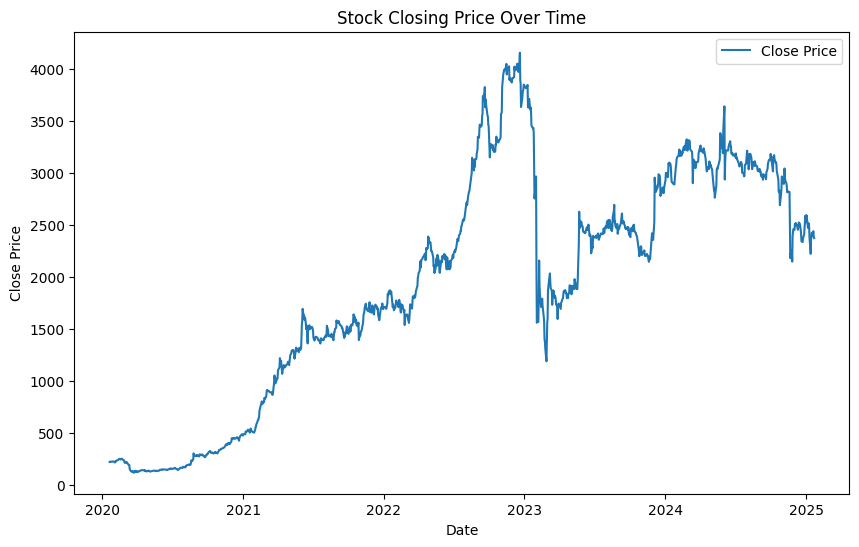

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


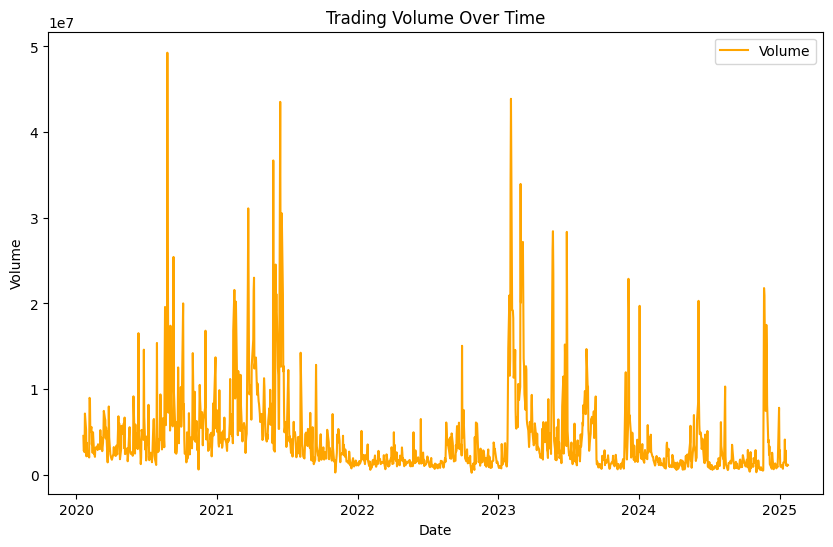

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

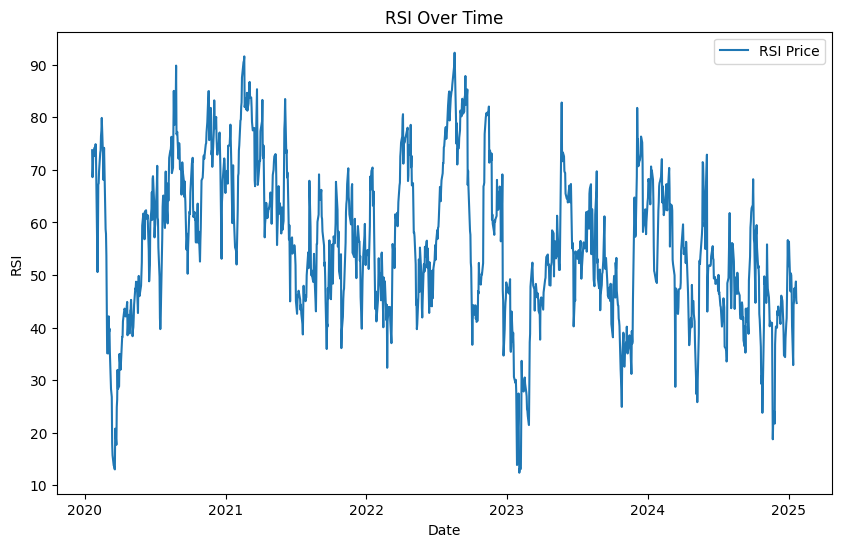

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['RSI'], label='RSI Price')
plt.title('RSI Over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

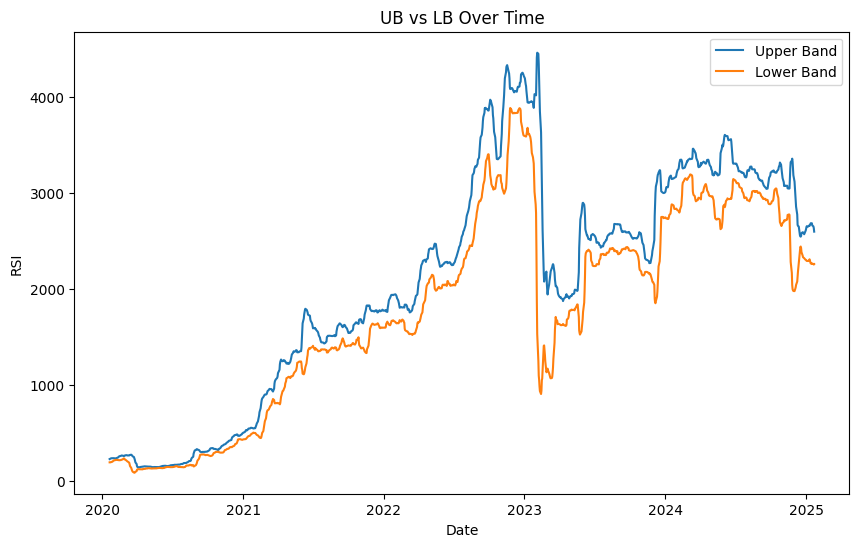

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Upper_Band'], label='Upper Band')
plt.plot(df['Date'], df['Lower_Band'], label='Lower Band')
plt.title('UB vs LB Over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

In [8]:
df = df.drop(['Date'], axis=1)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.8, random_state=101)

In [9]:
sequence_model = Sequential()
sequence_model.add(Dense(64,activation="relu"), Dropout(0.2))
sequence_model.add(Dense(32,activation="relu"), Dropout(0.2))
sequence_model.add(Dense(16,activation="relu"), Dropout(0.2))
sequence_model.add(Dense(8,activation="relu"), Dropout(0.2))
sequence_model.add(Dense(4,activation="relu"), Dropout(0.2))
# sequence_model.add(Dense(2,activation="relu"), Dropout(0.2))
sequence_model.add(Dense(1))

sequence_model.compile(optimizer="adam",loss=MeanSquaredError())

In [10]:
sequence_model.fit(x=X_train,y=y_train,epochs=300,verbose=2)

Epoch 1/300
8/8 - 5s - 646ms/step - loss: 5078059.5000
Epoch 2/300
8/8 - 0s - 23ms/step - loss: 5078028.0000
Epoch 3/300
8/8 - 0s - 18ms/step - loss: 5077997.0000
Epoch 4/300
8/8 - 0s - 21ms/step - loss: 5077966.5000
Epoch 5/300
8/8 - 0s - 23ms/step - loss: 5077935.5000
Epoch 6/300
8/8 - 0s - 25ms/step - loss: 5077904.5000
Epoch 7/300
8/8 - 0s - 29ms/step - loss: 5077873.5000
Epoch 8/300
8/8 - 0s - 22ms/step - loss: 5077842.5000
Epoch 9/300
8/8 - 0s - 20ms/step - loss: 5077811.5000
Epoch 10/300
8/8 - 0s - 20ms/step - loss: 5077781.0000
Epoch 11/300
8/8 - 0s - 24ms/step - loss: 5077750.0000
Epoch 12/300
8/8 - 0s - 29ms/step - loss: 5077718.0000
Epoch 13/300
8/8 - 0s - 30ms/step - loss: 5077687.5000
Epoch 14/300
8/8 - 0s - 26ms/step - loss: 5077657.0000
Epoch 15/300
8/8 - 0s - 19ms/step - loss: 5077625.5000
Epoch 16/300
8/8 - 0s - 17ms/step - loss: 5077595.0000
Epoch 17/300
8/8 - 0s - 18ms/step - loss: 5077565.0000
Epoch 18/300
8/8 - 0s - 21ms/step - loss: 5077533.0000
Epoch 19/300
8/8 -

In [16]:
loss_df = pd.DataFrame(sequence_model.history.history)

loss_df.plot()

TypeError: no numeric data to plot

In [12]:
sequence_model.evaluate(X_train,y_train,verbose=0)

5068795.0